In [5]:
import os

os.chdir("..")
%load_ext autoreload

%autoreload 2
from src.transforms.generate import (
    CreateSynthVolume,
    CustomMotion
)
import torchio as tio
from torchio import Subject
import seaborn as sb
import pandas as pd
from monai.transforms import (
    Compose,
    LoadImaged,
    Orientationd,
    ScaleIntensityd,
)
from torchio.transforms import (
    RandomMotion
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


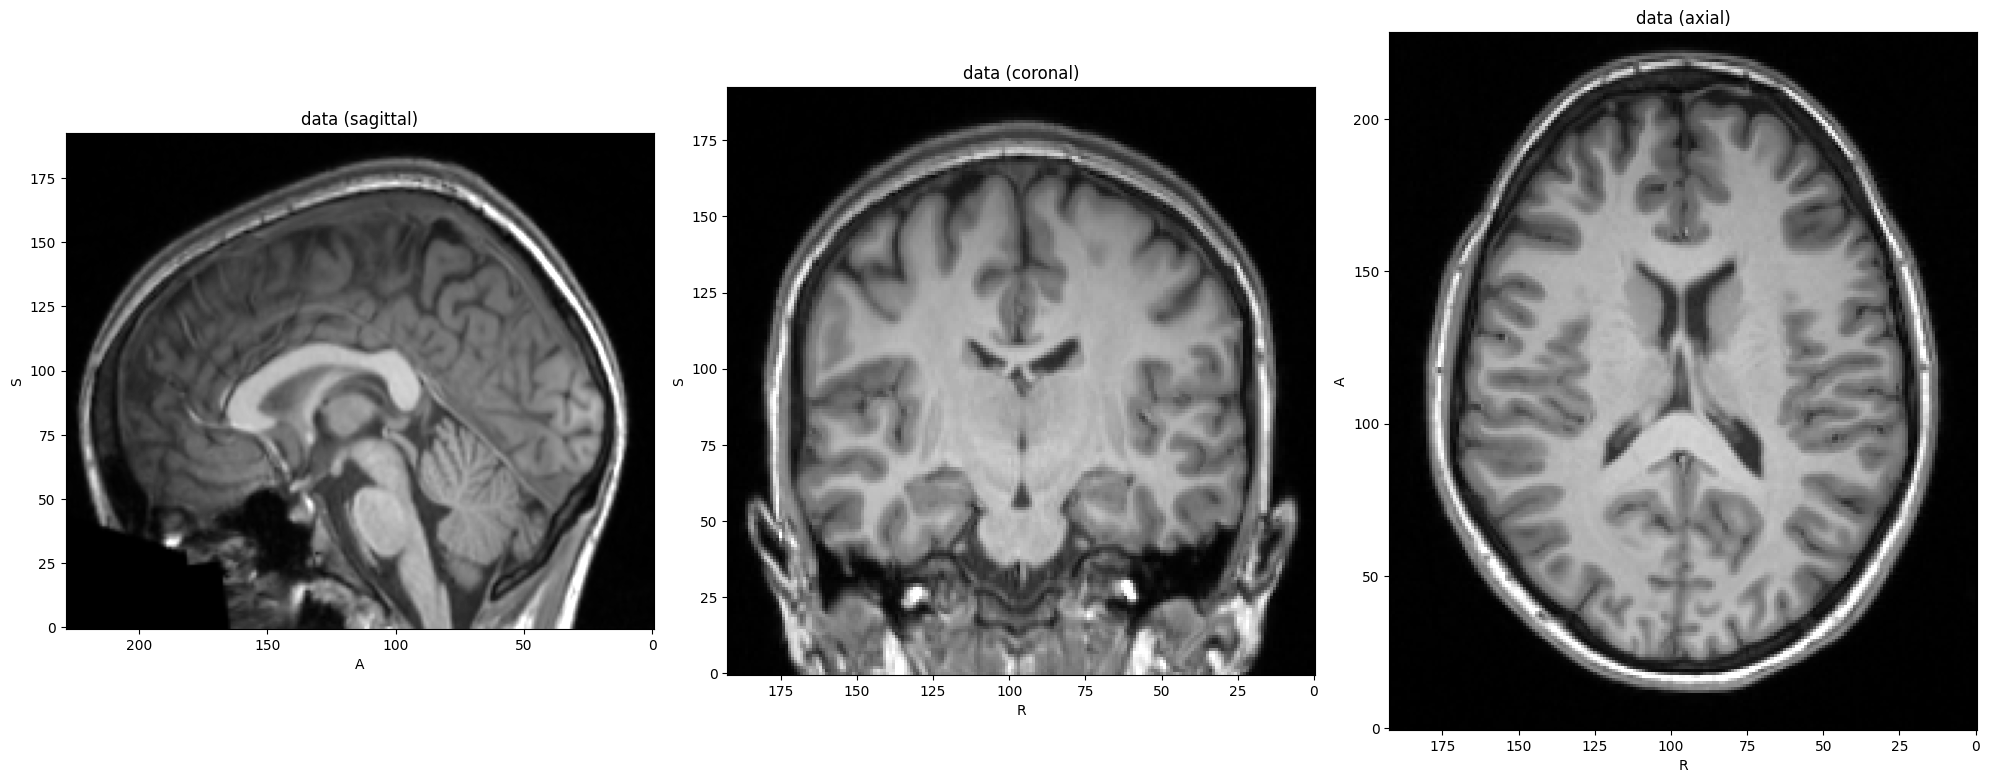

In [3]:
newp = Compose(
    [
        LoadImaged(keys="data", ensure_channel_first=True, image_only=True),
        Orientationd(keys="data", axcodes="RAS"),
        ScaleIntensityd(keys="data", minv=0, maxv=1),
    ]
)
unp = newp(
    {
        "data": r"C:\Users\Brico\Downloads\sub-067018_ses-standard_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz",
        "sub_id":"test",
        "ses_id":"test",
        "identifier":"test"
    }
)
unp["data"].max(), unp["data"].min()
base_sub = Subject(data=tio.ScalarImage(tensor=unp['data']))
base_sub.plot(figsize=(20,20))

4.460318044043063 4.456154686510613 2


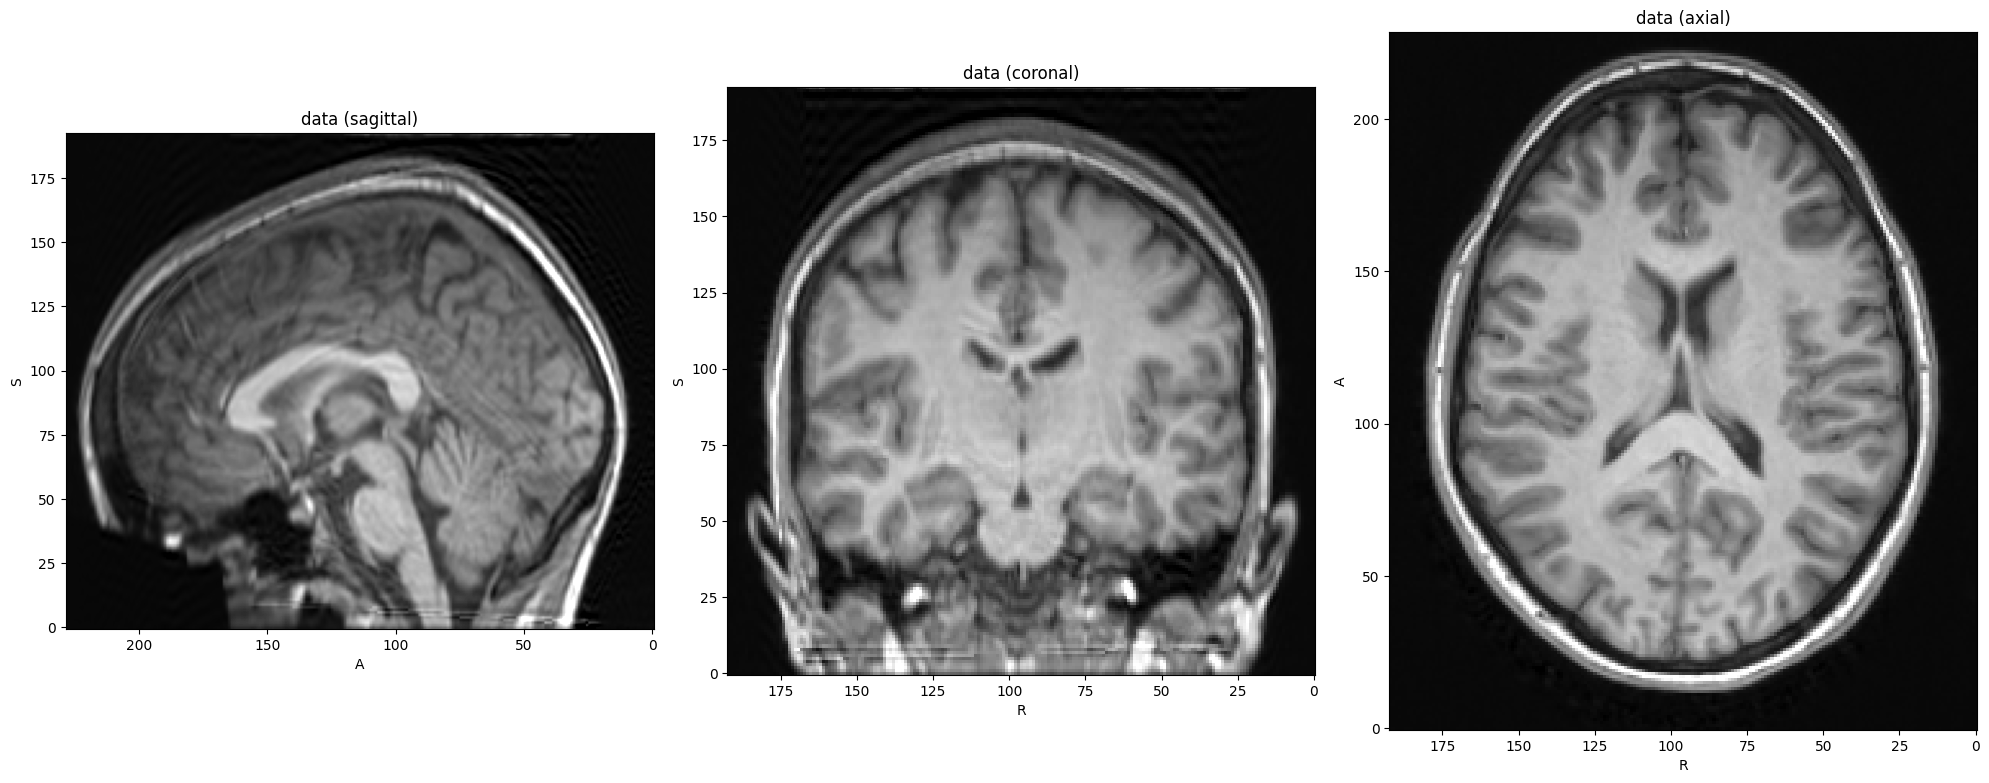

tensor([[[[-6.9174e-04, -9.8357e-05,  3.9214e-04,  ...,  3.2464e-04,
            3.3503e-04,  7.2586e-05],
          [-7.0393e-04, -1.1757e-04,  4.6640e-04,  ...,  1.5658e-04,
            2.7946e-04,  6.8929e-05],
          [-5.9222e-04, -1.0064e-04,  5.1506e-04,  ..., -2.1050e-04,
            3.4334e-04,  1.5130e-04],
          ...,
          [ 2.2635e-04,  9.9728e-05, -6.6821e-06,  ...,  6.1937e-04,
            4.6732e-04,  3.4476e-04],
          [ 2.1868e-04,  7.9044e-05, -3.8542e-05,  ...,  4.8229e-04,
            4.1832e-04,  3.3592e-04],
          [ 1.9713e-04,  2.4867e-05, -5.9322e-05,  ...,  6.2983e-04,
            5.7450e-04,  4.0793e-04]],

         [[-7.8289e-04,  5.4655e-05,  6.3013e-04,  ...,  3.4629e-04,
            1.4400e-04, -9.8770e-06],
          [-7.9744e-04, -6.9045e-05,  6.5541e-04,  ...,  1.7146e-04,
            1.8451e-04,  1.2054e-04],
          [-6.8034e-04, -1.2733e-04,  6.4253e-04,  ..., -2.9063e-05,
            3.4246e-04,  4.9638e-05],
          ...,
     

In [18]:
synth = CustomMotion(4, num_transforms_range=(2,3))(unp['data'])
sub_synth = Subject(data=tio.ScalarImage(tensor=synth))
sub_synth.plot(figsize=(20,20))
synth

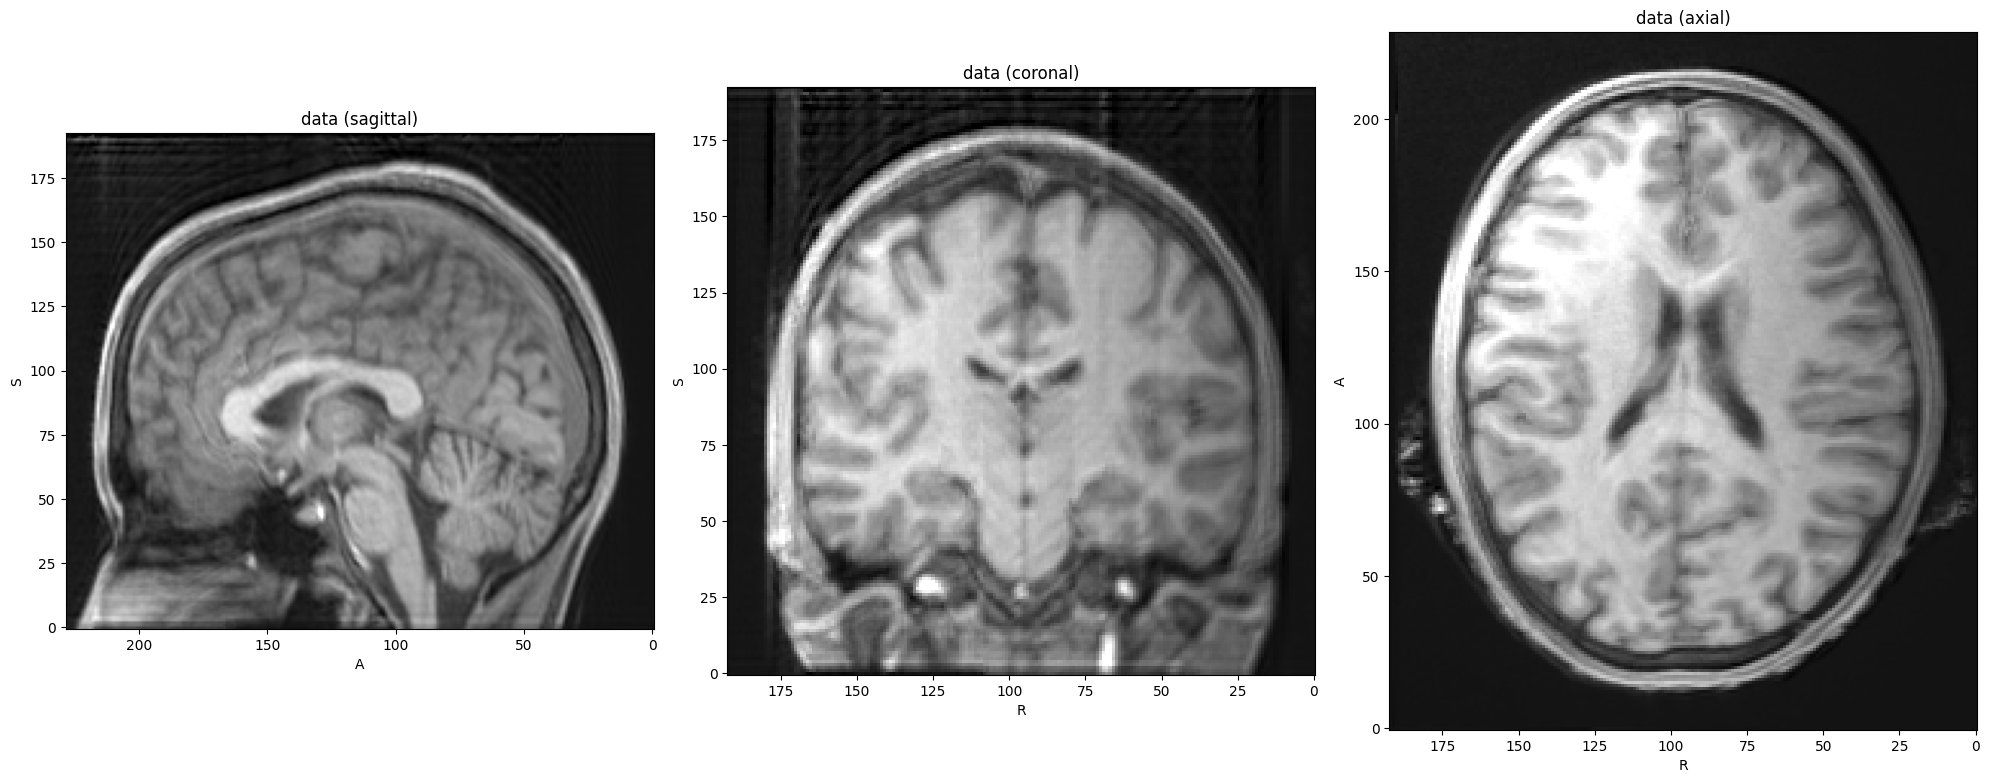

{'data': tensor([[[[ 3.5836e-04,  5.7057e-04,  2.9423e-04,  ..., -5.4482e-05,
            -1.3521e-03, -4.2797e-04],
           [ 8.5828e-04, -4.9483e-04,  9.7522e-04,  ...,  4.6785e-03,
             7.8706e-03, -1.4784e-02],
           [ 1.3206e-03, -1.1524e-05,  5.2278e-04,  ...,  6.5070e-03,
             1.2996e-02, -2.2364e-02],
           ...,
           [ 2.6712e-03,  1.9154e-03,  7.0651e-04,  ...,  2.3335e-02,
            -9.6102e-03, -1.8498e-02],
           [ 2.6862e-03,  1.8034e-03,  5.2153e-04,  ...,  2.5340e-02,
            -9.2372e-03, -1.8981e-02],
           [ 2.6971e-03,  1.8039e-03,  8.0311e-04,  ...,  2.5860e-02,
            -8.8130e-03, -1.8638e-02]],
 
          [[ 1.2319e-03,  8.4626e-04,  5.2178e-04,  ..., -3.9845e-03,
             4.8867e-03, -4.1487e-03],
           [ 1.1872e-03, -5.0479e-05,  1.3599e-03,  ...,  5.3518e-03,
             8.7388e-03, -1.3909e-02],
           [ 1.4896e-03,  2.1548e-04,  9.3027e-04,  ...,  5.6971e-03,
             1.4880e-02, -2.147

In [47]:
synth = CreateSynthVolume()(unp)
sub_synth = Subject(data=tio.ScalarImage(tensor=synth['data']))
sub_synth.plot(figsize=(20,20))
synth

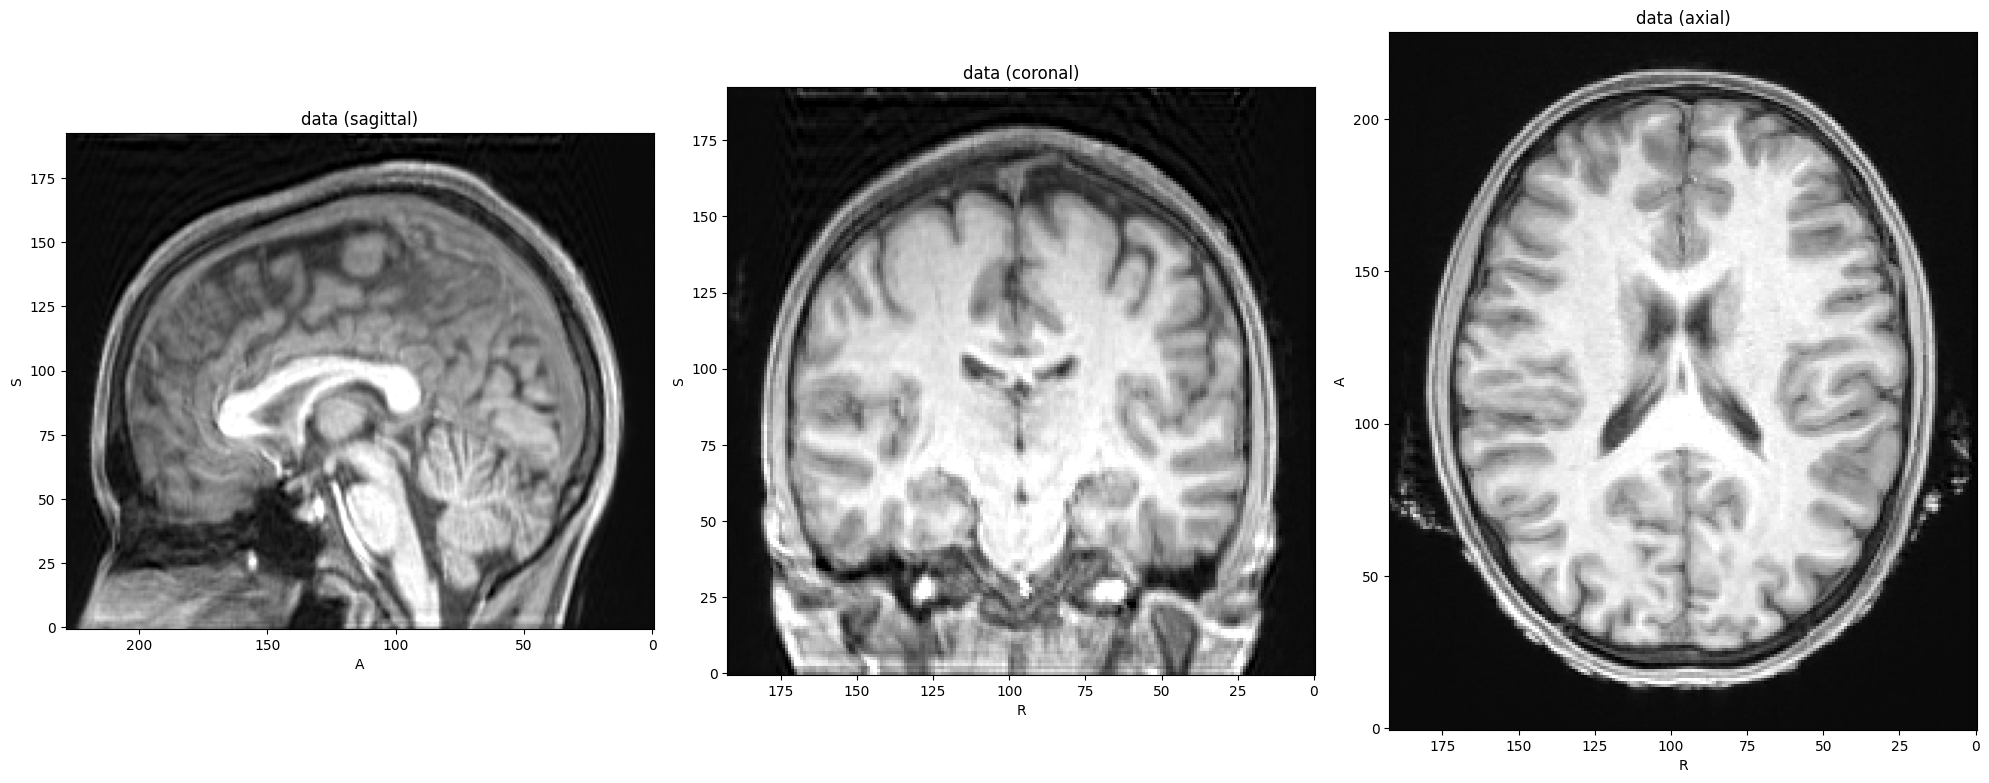

In [13]:
sub = Subject(data=tio.ScalarImage(tensor=unp['data']))
cm = RandomMotion(image_interpolation="bspline", num_transforms=6, degrees=1, translation=0.5)
motionned:Subject = cm(sub)
motionned.plot(figsize=(20,20))

/opt/anaconda/envs/bowl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda/envs/bowl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


7380

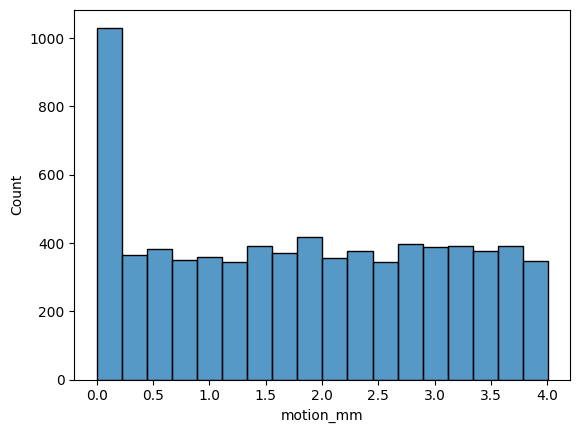

In [8]:
val_analysis = pd.read_csv(r"src/dataset/pretraining/train.csv")
sb.histplot(val_analysis, x="motion_mm")
len(val_analysis)

/opt/anaconda/envs/bowl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda/envs/bowl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.4048003554344177

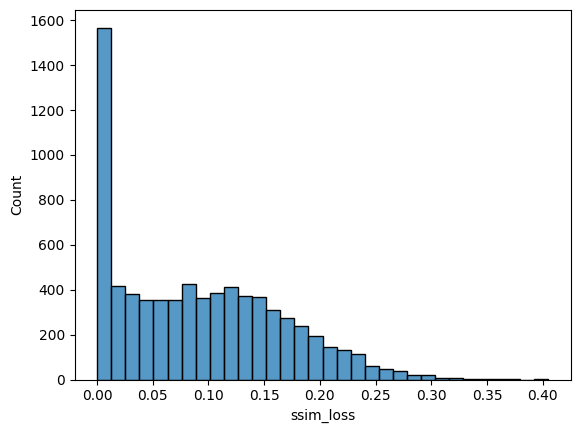

In [9]:
sb.histplot(val_analysis, x="ssim_loss")
val_analysis['ssim_loss'].max()

c:\Users\Brico\miniconda3\envs\bowl\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Brico\miniconda3\envs\bowl\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='motion_binary', ylabel='Count'>

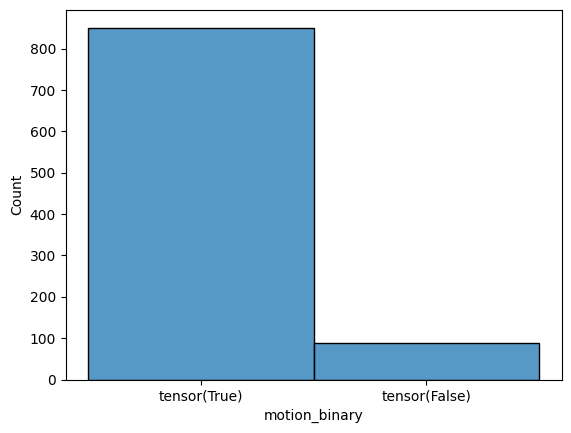

In [52]:
sb.histplot(val_analysis, x="motion_binary")